## Reading dataset

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('C:\pwskills_python_codes\Diabetes_prediction\Dataset\diabetes.csv')

In [86]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [87]:
df.shape

(768, 9)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There is no categorical data. 

In [89]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values present.

In [90]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- min value for Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI is zero. which can't be correct as no one has BloodPressure of zero. 
- which means there is missing value in form of 0.
- we have to handle this values.
- We can use mean or median for filling 0 values

- As there is no significance difference between mean and median(50%), we can use mean as filling values.

In [91]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

- Pregnancies can have 0 values

In [92]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [93]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 9)


No duplicate present

## Visualization

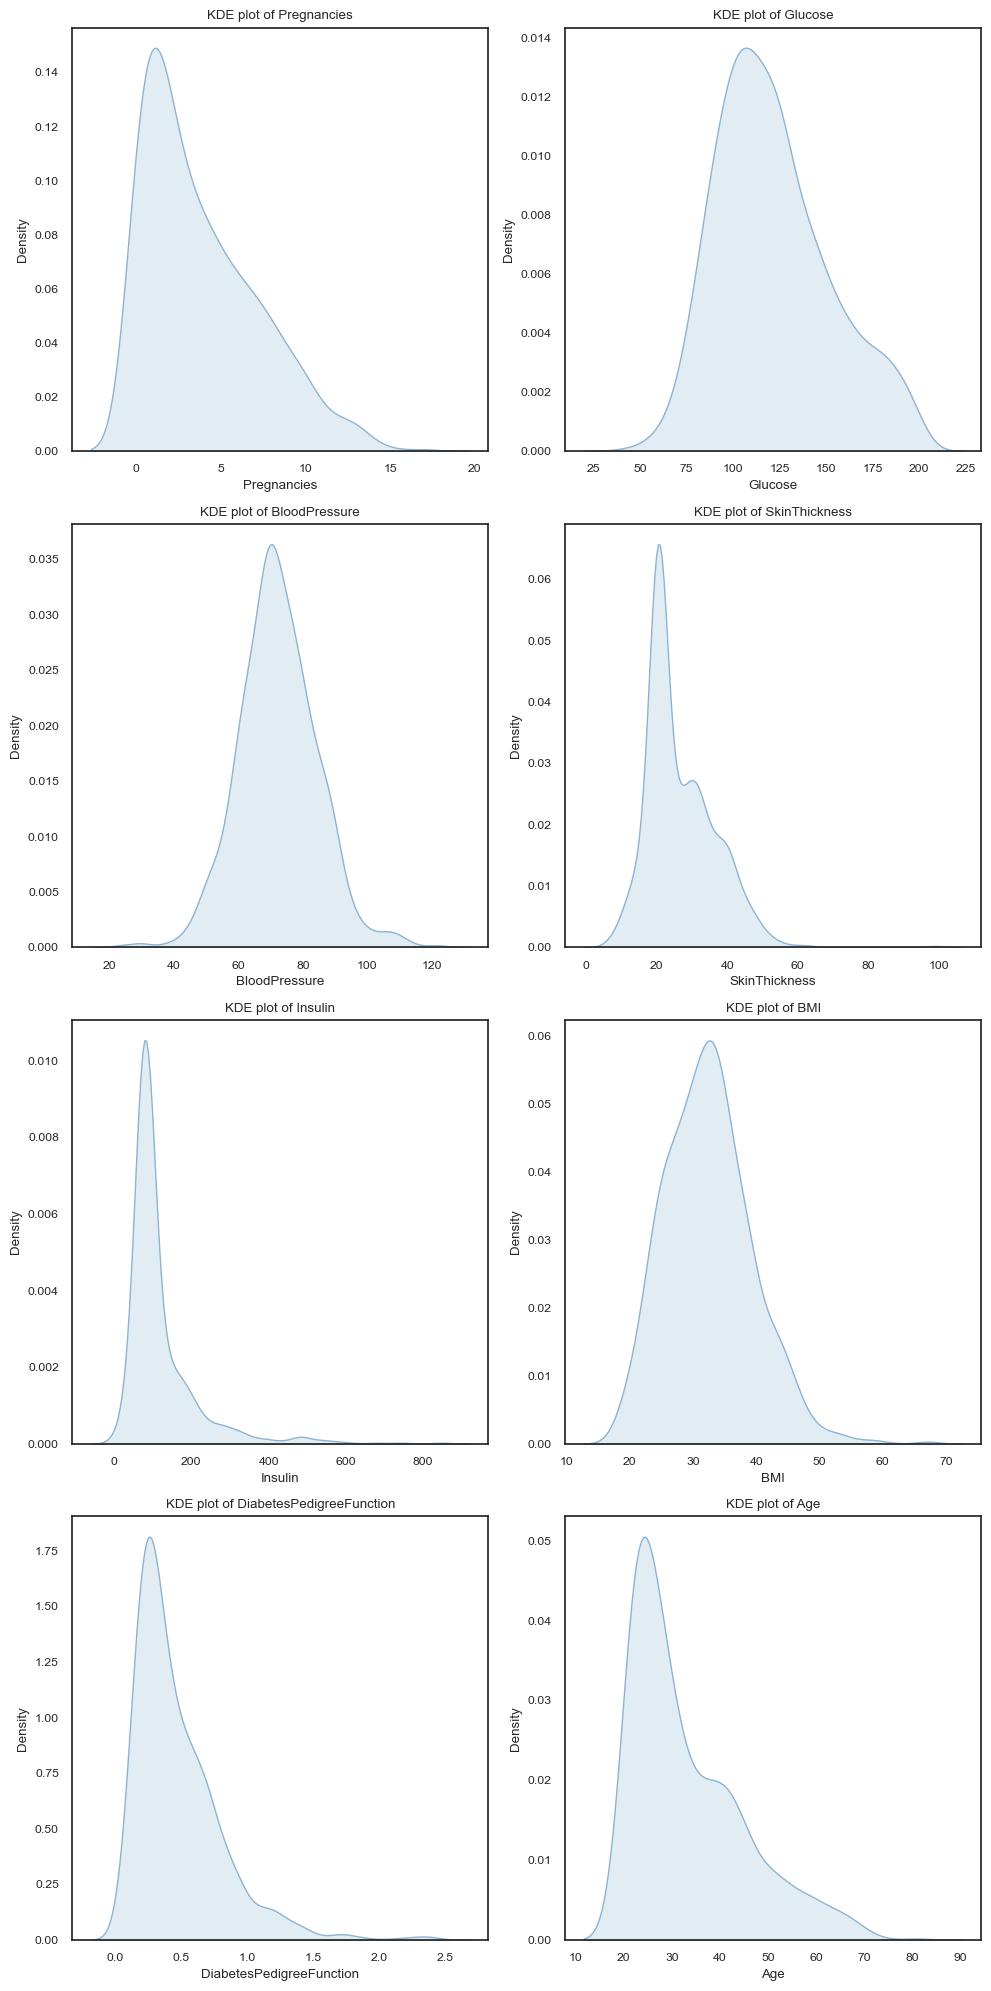

In [94]:
# Kernel Density Estimate (KDE) plots for each variable
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

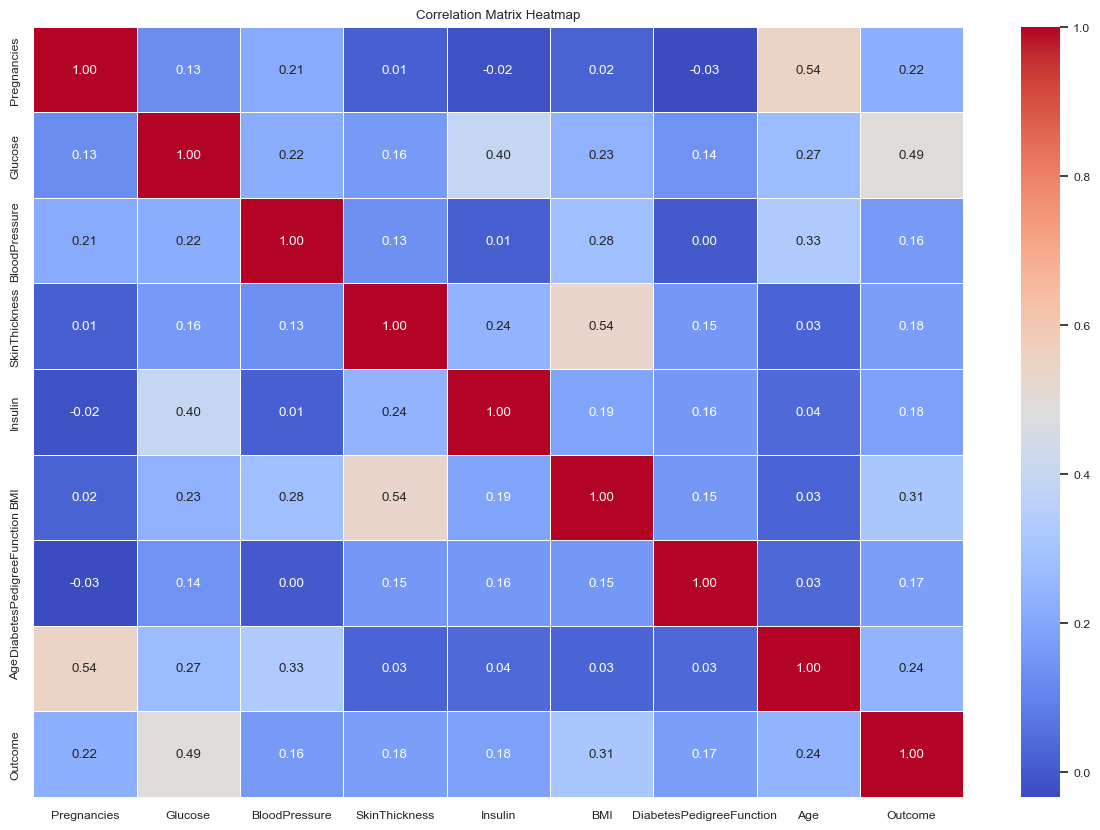

In [95]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

- There is no multicollinearity present.

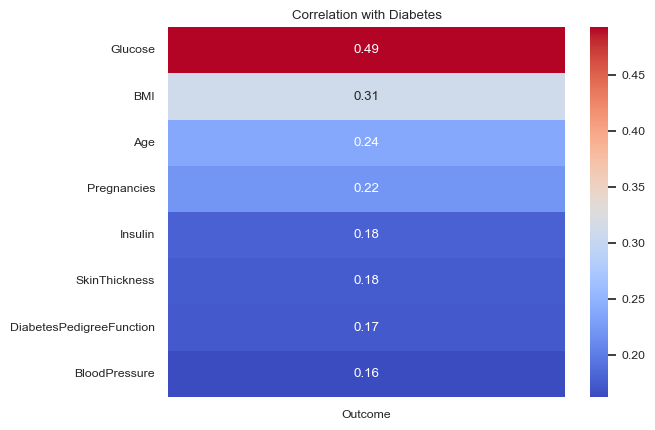

In [96]:
corr = df.corr()
target_corr = corr['Outcome'].drop('Outcome')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

- With a correlation of 0.49, Glucose is the most strongly correlated feature with the outcome. This suggests that higher glucose levels could be a significant indicator of diabetes.
- BMI can be also important factor in diabetes.

<Axes: >

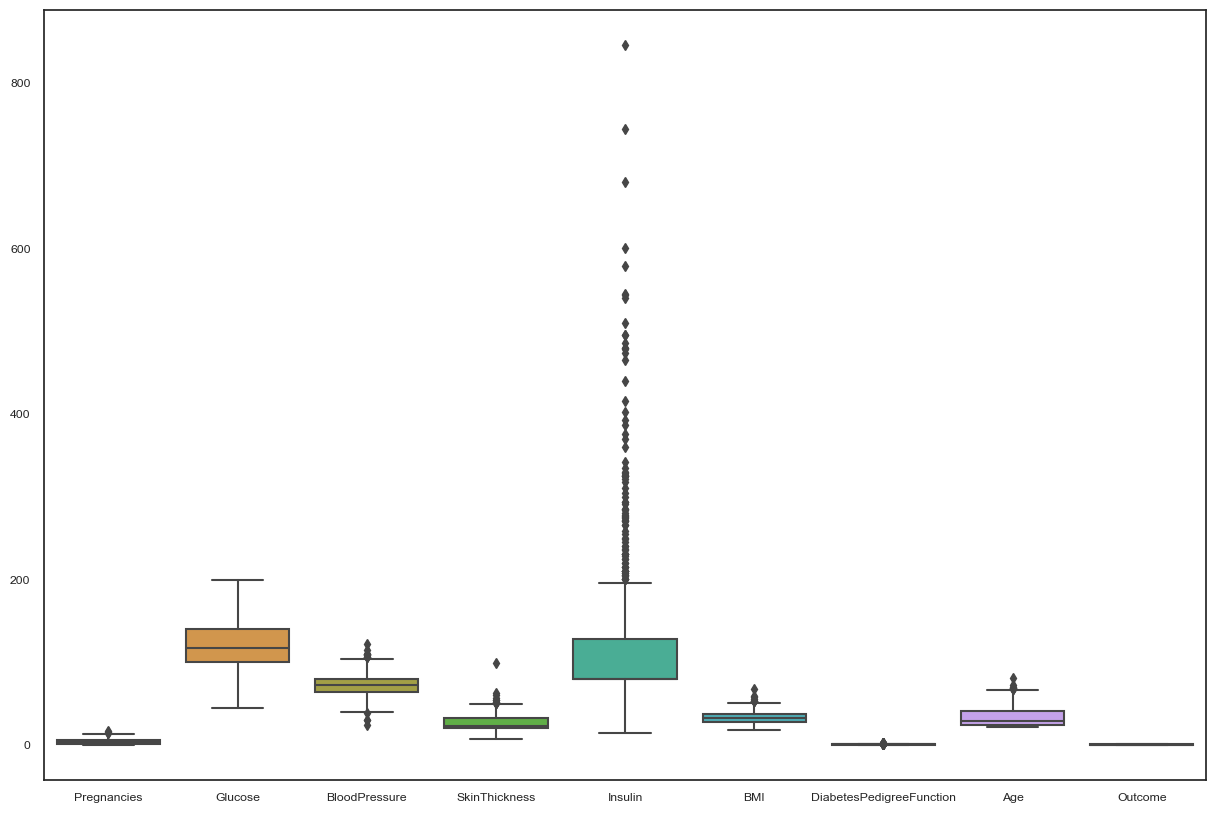

In [97]:
plt.figure(figsize=(15, 10))
sns.boxplot(df)

- There are many outliers in Insulin, which can be handeled using scalling the data. 

## Data splitting and Scaling

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pickle

- Splitting

In [99]:
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [100]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.0,79.799479,26.6,0.351,31


In [101]:
y.head(2)

0    1
1    0
Name: Outcome, dtype: int64

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30)

In [103]:
x_train.shape , x_test.shape

((537, 8), (231, 8))

In [104]:
y_train.shape , y_test.shape

((537,), (231,))

- Scaling

In [105]:
def std_scaler(x_train, x_test):
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Saving the pickle of scaler 
    file = open('StandardScalar.pkl','wb')
    pickle.dump(scaler, file)
    file.close()
    
    return x_train_scaled, x_test_scaled

In [106]:
x_train_scaled, x_test_scaled = std_scaler(x_train, x_test) 

In [107]:
x_train_scaled[:5]

array([[-0.84683171, -0.66549311,  0.12373527, -0.62954654, -0.41643345,
         0.98331968, -0.54773782,  0.69285995],
       [ 2.21544863, -1.2277813 ,  0.12373527, -0.62954654, -0.41643345,
        -0.33469282, -0.527377  ,  0.11370483],
       [-0.84683171, -0.16935648, -1.05505077, -0.37925901, -0.13848747,
         0.18409934, -0.04453488, -0.54818672],
       [-0.23437565, -1.3600844 ,  1.13412331, -1.09043542, -0.56282404,
        -0.69924946, -0.50992488, -0.96186895],
       [ 1.60299256,  0.02909817, -0.21306074,  1.75427024, -0.26578844,
         0.08594947, -0.31213413,  0.52738706]])

In [108]:
x_test_scaled[:5]

array([[-1.15305975, -0.69856889,  0.29213328, -0.62954654, -0.41643345,
         0.45050612, -0.82406313, -0.63092317],
       [-0.23437565, -0.53319001, -1.56024479, -0.58245227,  0.41315006,
        -0.22252154, -0.5506465 , -0.79639606],
       [ 1.90922059, -1.55853905,  0.7973273 , -0.62954654, -0.41643345,
         0.11399229, -0.63499844,  0.36191417],
       [-0.84683171,  0.72368946,  0.7973273 ,  1.34788371, -0.41643345,
         1.23570505,  0.36559006, -0.46545028],
       [ 0.07185239, -0.26858381, -0.71825476, -0.62954654, -0.41643345,
        -0.50294973, -1.03348863, -0.79639606]])

# Models Training 

### MODEL 1

In [109]:
log_reg = LogisticRegression()

In [110]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [111]:
y_pred = log_reg.predict(x_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [112]:
print('This is the confusion matrix for Logistic Regression :\n', confusion_matrix(y_test, y_pred))
print('\n')
print('This is the Accuracy for the Logistic Regression :\n', accuracy_score(y_test, y_pred))
print('\n')
print('This is the classification report for the Logistic Regression :\n \n' , classification_report(y_test, y_pred) )

This is the confusion matrix for Logistic Regression :
 [[140  19]
 [ 27  45]]


This is the Accuracy for the Logistic Regression :
 0.8008658008658008


This is the classification report for the Logistic Regression :
 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       159
           1       0.70      0.62      0.66        72

    accuracy                           0.80       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.80      0.80      0.80       231



- Accuracy of the model is 0.74 
- FN and FP both values are important here so we also consider precision, recall and f1-score as important factors, but they are also has good amount of values.
precision = 0.79, 
recall = 0.82, 
f1-score = 0.81

## MODEL 2 

In [113]:
## Hypertunning 

## GridSearchCV
from sklearn.model_selection import GridSearchCV

In [114]:
parameters = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'C' : np.logspace(-3,3,7),
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [115]:
logreg = LogisticRegression()
clf = GridSearchCV(
    logreg,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [116]:
# best parameters
clf.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [117]:
clf.best_score_

0.759643605870021

In [118]:
classifier = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
classifier.fit(x_train_scaled, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [119]:
y_pred_clf = classifier.predict(x_test_scaled)

In [120]:
print('This is the confusion matrix for GridSearchCV :\n', confusion_matrix(y_test, y_pred_clf))
print('\n')
print('This is the Accuracy for GridSearchCV :\n', accuracy_score(y_test, y_pred_clf))
print('\n')
print('This is the classification report for GridSearchCV :\n \n' , classification_report(y_test, y_pred_clf) )

This is the confusion matrix for GridSearchCV :
 [[140  19]
 [ 28  44]]


This is the Accuracy for GridSearchCV :
 0.7965367965367965


This is the classification report for GridSearchCV :
 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86       159
           1       0.70      0.61      0.65        72

    accuracy                           0.80       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.79      0.80      0.79       231



- Both the model has approx same accuracy, precision, recall and f1-score 
- we choose model 2.

In [121]:
file_ptr = open('modelForPrediction.pkl','wb')
pickle.dump(classifier, file_ptr)
file_ptr.close()